# Super resolution in CoLab
The test image and model are from https://github.com/Luchixiang/EMDiffuse

Please enable GPU in colab.


**Dependency for Execution**

In [1]:
!git clone https://github.com/Luchixiang/EMDiffuse
#Must be in the EMDiffuse directory to run the EMDiffuse code
%cd EMDiffuse/
%pip install -r requirements.txt

f:\super_resolution\EMDiffuse


fatal: destination path 'EMDiffuse' already exists and is not an empty directory.


Note: you may need to restart the kernel to use updated packages.


In [2]:
import requests
import os

def download_file(url, save_path):
    response = requests.get(url, stream=True)
    response.raise_for_status()  # Check for HTTP errors

    with open(save_path, 'wb') as file:
        for chunk in response.iter_content(chunk_size=8192):
            if chunk:  # Filter out keep-alive chunks
                file.write(chunk)
# URLs of the files to be downloaded
urls = {
    'api.py': 'https://raw.githubusercontent.com/Max-ChenFei/super_resolution/main/api.py',
    'image.tif': 'https://raw.githubusercontent.com/Max-ChenFei/super_resolution/main/image.tif'
}

for file_name, url in urls.items():
    save_path = os.path.join(os.getcwd(), file_name)
    download_file(url, save_path)
    print(f"Downloaded {file_name} to {save_path}")

Downloaded api.py to f:\super_resolution\EMDiffuse\api.py
Downloaded image.tif to f:\super_resolution\EMDiffuse\image.tif


**Usage**

results and model will be saved in experiments\test_EMDiffuse-r_240815_173448


f:\super_resolution\EMDiffuse\models\EMDiffuse_model.py:246: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  network.load_state_dict(torch.load(model_path, map_location=lambda

torch.Size([1, 1, 256, 256])
torch.float32
cuda:0


(-0.5, 255.5, 255.5, -0.5)

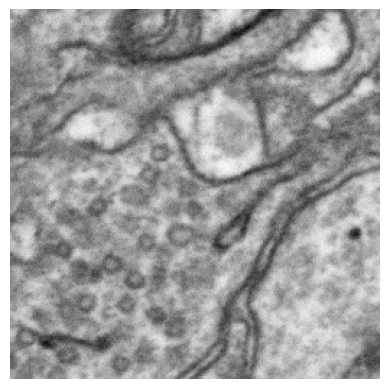

In [3]:
import os
from PIL import Image
import torch
from torchvision import transforms
import matplotlib.pyplot as plt
from api import super_resolution

image_path = os.path.join("image.tif")
image = Image.open(image_path)
to_tensor = transforms.ToTensor()
tensor = to_tensor(image).unsqueeze(0)
input_image = tensor.to(torch.device("cuda"))

output_image = super_resolution(input_image, 2)

print(output_image.shape)
print(output_image.dtype)
print(output_image.device)

plt.imshow(output_image.squeeze().cpu().numpy(), cmap="gray")
plt.axis("off")

In [4]:
import os
from PIL import Image
import torch
from torchvision import transforms
from api import super_resolution

image_path = os.path.join("image.tif")
image = Image.open(image_path)
to_tensor = transforms.ToTensor()
tensor = to_tensor(image).unsqueeze(0)
input_image = tensor.to(torch.device("cuda"))

output_image1 = super_resolution(input_image, 2)
output_image2 = super_resolution(input_image, 2)

print(f'reproduction: {torch.allclose(output_image1, output_image2)}')

sampling loop time step: 100%|██████████| 200/200 [00:09<00:00, 20.89it/s]

reproduction: False
